# Imports

In [113]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

# Read files

In [114]:
files_list = os.listdir('Data/load')
files_list

['Monthly-hourly-load-values_2006-2015.xlsx',
 'monthly_hourly_load_values_2023.csv',
 'monthly_hourly_load_values_2022.csv',
 'monthly_hourly_load_values_2021.csv',
 'MHLV_data-2015-2019.xlsx']

### 2006 - 2015

We skip this because we only use 2021-2023

In [25]:
load_2006_2015 = pd.read_excel('Data/load/Monthly-hourly-load-values_2006-2015.xlsx', header=3) 
load_2006_2015_NL = load_2006_2015[load_2006_2015['Country'] == 'NL']
load_2006_2015_NL

### 2015 - 2019

We skip this because we only use 2021-2023

In [ ]:
load_2015_2019 = pd.read_excel('Data/load/MHLV_data-2015-2019.xlsx', header=0) 
load_2015_2019

### 2021 - 2023

In [115]:
load_2021 = pd.read_csv('Data/load/monthly_hourly_load_values_2021.csv', delimiter=';')
load_2022 = pd.read_csv('Data/load/monthly_hourly_load_values_2022.csv', delimiter=';')
load_2023 = pd.read_csv('Data/load/monthly_hourly_load_values_2023.csv')

# Concat dfs

In [122]:
load = pd.concat([load_2021, load_2022, load_2023])
load_NL = load[load['CountryCode'] == 'NL']
load_NL.reset_index(drop=True, inplace=True)
load_NL = load_NL[['DateUTC', 'DateShort', 'Cov_ratio', 'Value', 'Value_ScaleTo100']]
load_NL

,DateUTC,DateShort,Cov_ratio,Value,Value_ScaleTo100
0,01/01/2021 00:00,01/01/2021,100,11313.1375,11313.1375
1,01/01/2021 01:00,01/01/2021,100,10925.1475,10925.1475
2,01/01/2021 02:00,01/01/2021,100,10576.8200,10576.8200
3,01/01/2021 03:00,01/01/2021,100,10371.1225,10371.1225
4,01/01/2021 04:00,01/01/2021,100,10420.2075,10420.2075
...,...,...,...,...,...
24067,30/09/2023 19:00,30/09/2023,100,12210.0050,12210.0050
24068,30/09/2023 20:00,30/09/2023,100,11532.9300,11532.9300
24069,30/09/2023 21:00,30/09/2023,100,10355.4475,10355.4475
24070,30/09/2023 22:00,30/09/2023,100,9813.3175,9813.3175


Format date column

In [123]:
load_NL['Date'] = pd.to_datetime(load_NL['DateShort'], dayfirst=True, format='%d/%m/%Y')

### Checks

In [124]:
load_NL['Cov_ratio'].unique()

array([100])

Cov ratio is always 100 so we can drop it

In [125]:
load_NL[load_NL['Value'] != load_NL['Value_ScaleTo100']]

,DateUTC,DateShort,Cov_ratio,Value,Value_ScaleTo100,Date


Value is always the same as Value_ScaleTo100 so we only have to keep one of them

### Apply logic after checks

In [126]:
load_NL.drop(columns=['Cov_ratio', 'Value_ScaleTo100'], inplace=True)
load_NL

,DateUTC,DateShort,Value,Date
0,01/01/2021 00:00,01/01/2021,11313.1375,2021-01-01
1,01/01/2021 01:00,01/01/2021,10925.1475,2021-01-01
2,01/01/2021 02:00,01/01/2021,10576.8200,2021-01-01
3,01/01/2021 03:00,01/01/2021,10371.1225,2021-01-01
4,01/01/2021 04:00,01/01/2021,10420.2075,2021-01-01
...,...,...,...,...
24067,30/09/2023 19:00,30/09/2023,12210.0050,2023-09-30
24068,30/09/2023 20:00,30/09/2023,11532.9300,2023-09-30
24069,30/09/2023 21:00,30/09/2023,10355.4475,2023-09-30
24070,30/09/2023 22:00,30/09/2023,9813.3175,2023-09-30


# Plots

### Daily sum

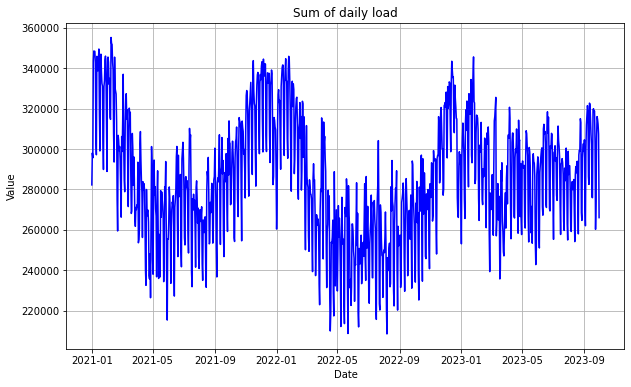

In [154]:
daily_sum = load_NL.groupby('Date')['Value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, linestyle='-', color='b')

plt.title('Sum of daily load')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Monthly sum

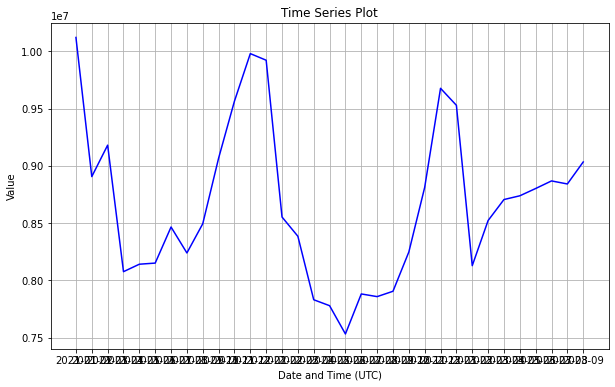

In [128]:
monthly_sum = load_NL.groupby(load_NL['Date'].dt.to_period("M"))['Value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sum.index.astype(str), monthly_sum.values, linestyle='-', color='b')

plt.title('Time Series Plot')
plt.xlabel('Date and Time (UTC)')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Plot for the individual years

2021

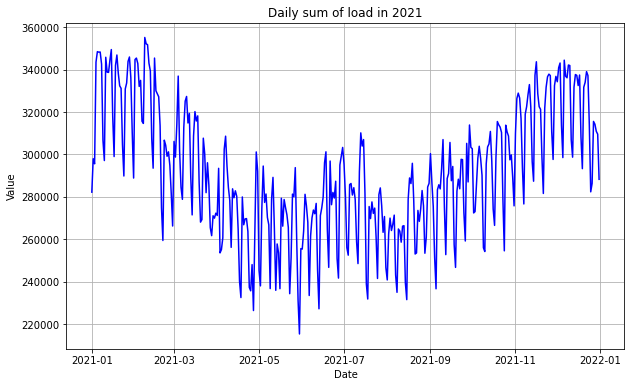

In [144]:
daily_sum = load_NL[load_NL['Date'].dt.year == 2021].groupby('Date')['Value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, linestyle='-', color='b')

plt.title('Daily sum of load in 2021')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

2022

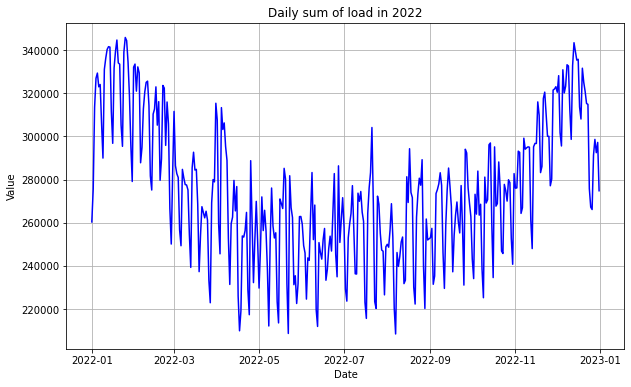

In [145]:
daily_sum = load_NL[load_NL['Date'].dt.year == 2022].groupby('Date')['Value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, linestyle='-', color='b')

plt.title('Daily sum of load in 2022')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

2023

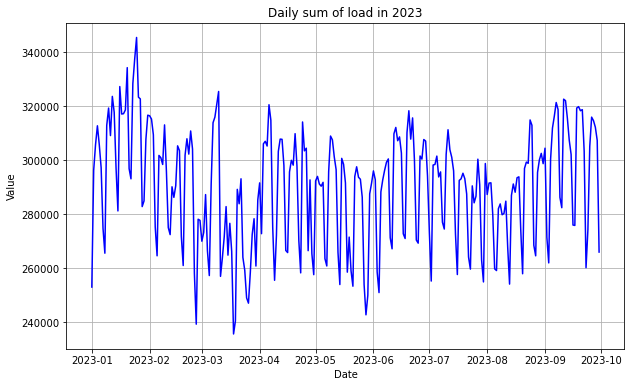

In [147]:
daily_sum = load_NL[load_NL['Date'].dt.year == 2023].groupby('Date')['Value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, linestyle='-', color='b')

plt.title('Daily sum of load in 2023')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Average load per hour over the entire timeseries

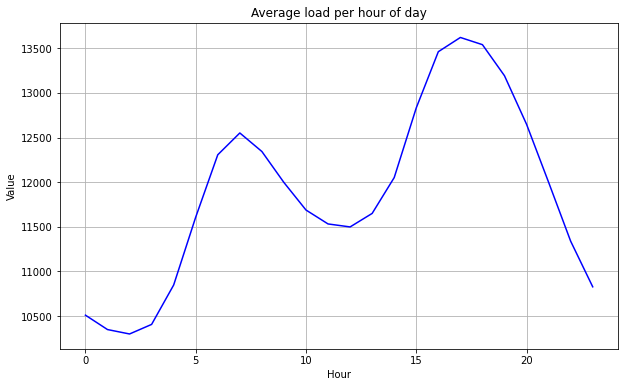

In [155]:
load_NL['DateUTC'] = pd.to_datetime(load_NL['DateUTC'], format='%d/%m/%Y %H:%M')
load_NL['Hour'] = load_NL['DateUTC'].dt.hour

# Group by 'Hour' and calculate the average load for each hour
hourly_avg_load = load_NL.groupby('Hour')['Value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_load.index, hourly_avg_load.values, linestyle='-', color='b')

plt.title('Average load per hour of day')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Plot for a single day

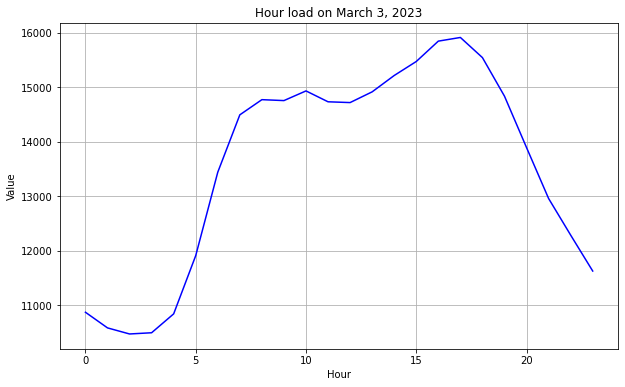

In [153]:
example_march_10_2023 = load_NL[load_NL['Date']=='2023-03-10']

plt.figure(figsize=(10, 6))
plt.plot(example_march_10_2023.Hour, example_march_10_2023.Value, linestyle='-', color='b')

plt.title('Hour load on March 3, 2023')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Check how many days in each month to see if data makes sense

-> yes

In [141]:
load_NL['Day'] = load_NL['Date'].dt.day
load_NL.groupby('Month')['Day'].nunique()

Month
2021-01    31
2021-02    28
2021-03    31
2021-04    30
2021-05    31
2021-06    30
2021-07    31
2021-08    31
2021-09    30
2021-10    31
2021-11    30
2021-12    31
2022-01    31
2022-02    28
2022-03    31
2022-04    30
2022-05    31
2022-06    30
2022-07    31
2022-08    31
2022-09    30
2022-10    31
2022-11    30
2022-12    31
2023-01    31
2023-02    28
2023-03    31
2023-04    30
2023-05    31
2023-06    30
2023-07    31
2023-08    31
2023-09    30
Freq: M, Name: Day, dtype: int64

### Check how many hours in each month to see if it makes sense

-> yes

In [142]:
load_NL.groupby('Month')['DateUTC'].nunique()

Month
2021-01    744
2021-02    672
2021-03    743
2021-04    720
2021-05    744
2021-06    720
2021-07    744
2021-08    744
2021-09    720
2021-10    744
2021-11    720
2021-12    744
2022-01    744
2022-02    672
2022-03    743
2022-04    720
2022-05    744
2022-06    720
2022-07    744
2022-08    744
2022-09    720
2022-10    744
2022-11    720
2022-12    744
2023-01    744
2023-02    672
2023-03    743
2023-04    720
2023-05    744
2023-06    720
2023-07    744
2023-08    744
2023-09    720
Freq: M, Name: DateUTC, dtype: int64

In [2]:
path = 'ersst.v5.185401.nc'

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4


nc = netCDF4.Dataset(path)
# h = nc.variables[vname]
# times = nc.variables['time']
# jd = netCDF4.num2date(times[:],times.units)
# hs = pd.Series(h[:,station],index=jd)

# fig = plt.figure(figsize=(12,4))
# ax = fig.add_subplot(111)
# hs.plot(ax=ax,title='%s at %s' % (h.long_name,nc.id))
# ax.set_ylabel(h.units)

In [4]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6, ACDD-1.3
    metadata_link: https://doi.org/10.7289/V5T72FNM
    id: ersst.v5.185401
    naming_authority: gov.noaa.ncei
    title: NOAA ERSSTv5 (in situ only)
    summary: ERSST.v5 is developped based on v4 after revisions of 8 parameters using updated data sets and advanced knowledge of ERSST analysis
    institution: NOAA/NESDIS/NCEI/CCOG
    creator_name: Boyin Huang
    creator_email: boyin.huang@noaa.gov
    date_created: 2017-06-30T12:18:00Z
    date_modified: 2017-06-30T12:18:00Z
    product_version: Version 5
    history: Fri Jun 30 12:22:38 2017: ncatted -O -a _FillValue,ssta,o,f,-999.0 ssta.nc
Version 5 based on Version 4
    creator_url: https://www.ncei.noaa.gov
    license: No constraints on data access or use
    time_coverage_start: 1854-01-01T00:00:00Z
    time_coverage_end: 1854-02-01T00:00:00Z
    geospatial_lon_min: -1.0
    geospatial_lon_max: 3

In [6]:
nc['sst']

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lev, lat, lon)
    _FillValue: -999.0
    long_name: Extended reconstructed sea surface temperature
    standard_name: sea_surface_temperature
    units: degree_C
    add_offset: 0.0
    scale_factor: 1.0
    valid_min: -3.0
    valid_max: 45.0
unlimited dimensions: 
current shape = (1, 1, 89, 180)
filling on

In [10]:
h

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lev, lat, lon)
    _FillValue: -999.0
    long_name: Extended reconstructed sea surface temperature
    standard_name: sea_surface_temperature
    units: degree_C
    add_offset: 0.0
    scale_factor: 1.0
    valid_min: -3.0
    valid_max: 45.0
unlimited dimensions: 
current shape = (1, 1, 89, 180)
filling on

In [11]:
times

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Start time of month
    standard_name: time
    axis: T
    delta_t: 0000-01-00
    avg_period: 0000-01-00
    calendar: 360_day
    units: minutes since 1854-01-01 00:00
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [12]:
times[:]

masked_array(data=[0.],
             mask=False,
       fill_value=1e+20)

In [13]:
times.units

'minutes since 1854-01-01 00:00'

In [14]:
jd

masked_array(data=[cftime.DatetimeGregorian(1854, 1, 1, 0, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

In [15]:
h[:,station]

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.7999999523162842, -1.7999999523162842, -1.7999999523162842,
          ..., -1.7999999523162842, -1.7999999523162842,
          -1.7999999523162842],
         [-1.7999999523162842, -1.7999999523162842, -1.7999999523162842,
          ..., -1.7999999523162842, -1.7999999523162842,
          -1.7999999523162842],
         [-1.7999999523162842, -1.7999999523162842, -1.7999999523162842,
          ..., -1.7999999523162842, -1.7999999523162842,
          -1.7999999523162842]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],


In [17]:
hs = pd.Series(h,index=jd)


In [21]:
hs

1854-01-01 00:00:00    [[[[-- -- -- -- -- -- -- -- -- -- -- -- -- -- ...
dtype: object

In [9]:
vname = 'sst'
station = 0

nc = netCDF4.Dataset(path)
h = nc.variables[vname]
times = nc.variables['time']
jd = netCDF4.num2date(times[:],times.units)
hs = pd.Series(h[:,station],index=jd)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
hs.plot(ax=ax,title='%s at %s' % (h.long_name,nc.id))
ax.set_ylabel(h.units)

ValueError: Data must be 1-dimensional